In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import sqlite3
import SQL_queris as w

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot ## For offline mode.
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt ##Again, visualizatoin.



In [11]:
tracks_zip_file_path = './data/tracks.csv.zip'
artists_zip_file_path = './data/artists.csv.zip'
grammy_zip_file_path = './data/the_grammy_awards.csv.zip'
spotify2023_zip_path = './data/spotify_2023.csv'

tracks_csv_file = 'tracks.csv'
artists_csv_file = 'artists.csv'
grammyWinners_csv_file = 'the_grammy_awards.csv'
spotify2023_tracks_csv_file = 'spotify_2023.csv'

# with zipfile.ZipFile(spotify2023_zip_path, 'r') as p:
#     with p.open(spotify2023_tracks_csv_file) as i:
#         spotify2023_tracks = pd.read_csv(i)

with zipfile.ZipFile(tracks_zip_file_path, 'r') as z:
    with z.open(tracks_csv_file) as f:
        tracks = pd.read_csv(f)
        tracks.to_csv('tracks.csv')

with zipfile.ZipFile(artists_zip_file_path, 'r') as q:
    with q.open(artists_csv_file) as g:
        artists = pd.read_csv(g)
        artists.to_csv('artists.csv')

with zipfile.ZipFile(grammy_zip_file_path, 'r') as b:
    with b.open(grammyWinners_csv_file) as c:
        grammyWinners = pd.read_csv(c)
        grammyWinners.to_csv('the_grammy_awards.csv')


spotify_data_files = ['tracks.csv', 'artists.csv', 'the_grammy_awards.csv', 'spotify2023_tracks.csv']





In [12]:
spotify2023_tracks = pd.read_csv(spotify2023_zip_path)
spotify2023_tracks.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/spotify_2023.csv'

In [15]:
def create_sql_database(spotify_data_files, db_name):
    conn =sqlite3.connect(db_name)

    for file in spotify_data_files:
        df = pd.read_csv(file, low_memory=False)
        df.to_sql(name=file.replace('.csv', ''), con=conn)
    conn.commit()
    conn.close()
    

In [16]:
create_sql_database(spotify_data_files, 'Spotify_data.db')


ValueError: Table 'tracks' already exists.

In [17]:
table_test_query = """
    SELECT name FROM sqlite_master 
    WHERE type='table';
    """
conn = sqlite3.connect('Spotify_data.db')
cur = conn.cursor()
cur.execute(table_test_query)
print("List of tables\n")
# printing all tables list
print(cur.fetchall())

List of tables

[('tracks',), ('artists',), ('the_grammy_awards',)]


In [18]:

spotify_DF = pd.read_sql_query(w.spotify_tracks_data_query, conn)

spotify_DF.head()


,index,Unnamed: 0,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,...,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,1,1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,...,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,2,2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,...,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,3,3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,...,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,4,4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,...,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [19]:
pd.concat([artists, spotify_DF])

,id,followers,genres,name,popularity,index,Unnamed: 0,duration_ms,explicit,artists,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,NaN,NaN,云与海,50,586667.0,586667.0,258267.0,0.0,['阿YueYue'],...,0.0,-7.471,0.0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4.0
586668,0NuWgxEp51CutD2pJoF4OM,NaN,NaN,blind,72,586668.0,586668.0,153293.0,0.0,['ROLE MODEL'],...,0.0,-5.223,1.0,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,NaN,NaN,What They'll Say About Us,70,586669.0,586669.0,187601.0,0.0,['FINNEAS'],...,7.0,-12.823,0.0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4.0
586670,45XJsGpFTyzbzeWK8VzR8S,NaN,NaN,A Day At A Time,58,586670.0,586670.0,142003.0,0.0,"['Gentle Bones', 'Clara Benin']",...,10.0,-6.212,1.0,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4.0


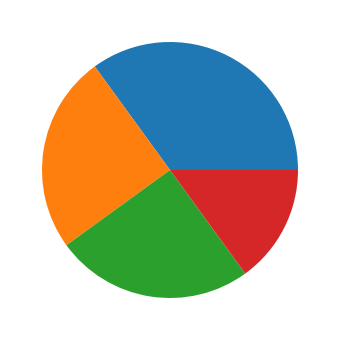

In [11]:
y = np.array([35, 25, 25, 15])

plt.pie(y)
plt.show() 